# Wicklow isolates snipgenie analysis

* https://www.microbiologyresearch.org/content/journal/mgen/10.1099/mgen.0.000388?crawler=true

In [1]:
import sys,os,shutil,subprocess
import glob
from importlib import reload
import numpy as np
import pandas as pd
pd.set_option('display.width', 200)
import pylab as plt
import matplotlib as mpl
from Bio import SeqIO
sys.path.append('pathogenie')
from snipgenie import tools, aligners, app, trees, plotting
#import rpy2

## Run workflow 

In [3]:
reload(app)
reload(tools)
args = {'threads':12, 'outdir': '/storage/btbgenie/wicklow_results', 'labelsep':'_',
        'input':['/storage/btbgenie/mbovis_ireland/Wicklow/'],        
         'species': 'Mbovis-AF212297',
         'overwrite':False,
         'custom_filters': True, 'get_stats':False,        
         'buildtree':True}
W = app.WorkFlow(**args)
st = W.setup()
W.run()

The following options were supplied
time:  11/10/2023 11:02:07
-------
threads : 12
outdir : /storage/btbgenie/wicklow_results
labelsep : _
input : ['/storage/btbgenie/mbovis_ireland/Wicklow/']
species : Mbovis-AF212297
overwrite : False
custom_filters : True
get_stats : False
buildtree : True
labelindex : 0
trim : False
unmapped : False
quality : 25
aligner : bwa
platform : illumina
filters : QUAL>=40 && FORMAT/DP>=30 && DP4>=4
mask : None
reference : None
gb_file : None
omit_samples : []
bootstraps : 100
logfile : /storage/btbgenie/wicklow_results/run.log

48 samples were loaded:
----------------------
         sample                                          filename1                                          filename2                        name1                        name2  read_length
0          1034  /storage/btbgenie/mbovis_ireland/Wicklow/other...  /storage/btbgenie/mbovis_ireland/Wicklow/other...       1034_S91_L001-4_R1_001       1034_S91_L001-4_R2_001          149
1      13-

[bwa_index] Pack FASTA... 0.02 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 0.66 seconds elapse.
[bwa_index] Update BWT... 0.02 sec
[bwa_index] Pack forward-only FASTA... 0.01 sec
[bwa_index] Construct SA from BWT and Occ... 0.23 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index /home/farrell/.config/snipgenie/genome/Mbovis_AF212297.fa
[main] Real time: 0.950 sec; CPU: 0.939 sec


bwa index /home/farrell/.config/snipgenie/genome/Mbovis_AF212297.fa
aligning files
--------------
Using reference genome: /home/farrell/.config/snipgenie/genome/Mbovis_AF212297.fa
48/48 samples already aligned

calling variants
----------------
/storage/btbgenie/wicklow_results/raw.bcf already exists
calling variants..
bcftools call --ploidy 1 -m -v -o /storage/btbgenie/wicklow_results/calls.vcf /storage/btbgenie/wicklow_results/raw.bcf


/home/farrell/gitprojects/snipgenie/snipgenie/app.py:370: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '/storage/btbgenie/wicklow_results/mapped/1034.bam' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[i,'bam_file'] = os.path.abspath(out)


726 sites called as variants
bcftools reheader --samples /storage/btbgenie/wicklow_results/samples.txt -o /tmp/calls.vcf /storage/btbgenie/wicklow_results/calls.vcf
bcftools filter -i "QUAL>=40 && FORMAT/DP>=30 && DP4>=4" -o /storage/btbgenie/wicklow_results/filtered.vcf.gz -O z /storage/btbgenie/wicklow_results/calls.vcf
splitting snps and indels..
bcftools view -v snps -o /storage/btbgenie/wicklow_results/snps.vcf.gz -O z /storage/btbgenie/wicklow_results/filtered.vcf.gz
bcftools view -v indels -o /storage/btbgenie/wicklow_results/indels.vcf.gz -O z /storage/btbgenie/wicklow_results/filtered.vcf.gz
using mask bed file /home/farrell/gitprojects/snipgenie/snipgenie/data/Mbovis_AF212297_mask.bed
538 sites
found 65 sites in masked regions
bcftools view /storage/btbgenie/wicklow_results/temp.vcf -O z -o /storage/btbgenie/wicklow_results/snps.vcf.gz
using mask bed file /home/farrell/gitprojects/snipgenie/snipgenie/data/Mbovis_AF212297_mask.bed
50 sites
found 11 sites in masked regions
bcft

In [ ]:
#snprecs, smat = tools.fasta_alignment_from_vcf('/storage/btbgenie/wicklow_results/filtered.vcf.gz', omit=['161-MBovis'])

In [ ]:
meta = pd.read_csv('/storage/btbgenie/mbovis_ireland/all_ireland_samples.csv')
clusts = trees.get_clusters('/storage/btbgenie/wicklow_results/tree.newick')

In [4]:
%load_ext rpy2.ipython

In [ ]:
%%R
source('drawtrees.R')
options(repr.plot.width=20, repr.plot.height=10)

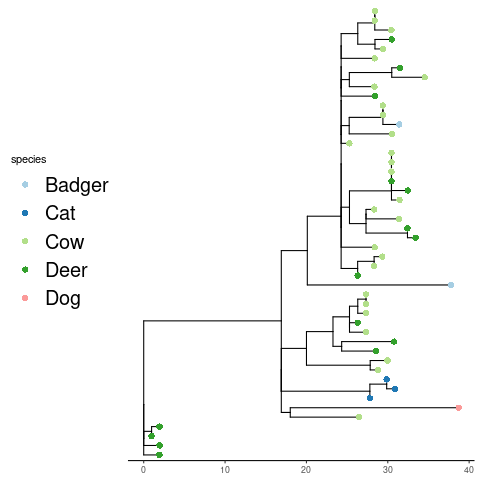

In [9]:
%%R
meta <- read.table('/storage/btbgenie/mbovis_ireland/all_ireland_samples.csv',sep=',',
                      header=TRUE,row.names=1)
meta[is.na(meta)] <- "-"
meta[] <- lapply(meta, as.character)
mltree <- read.tree('/storage/btbgenie/wicklow_results/tree.newick')
mltree <- drop.tip(mltree,c('ref'))
#mltree <- root(mltree, outgroup='44-MBovis')
ggplottree(mltree, meta, 'species', layout='rect', cmap='Paired', tiplabel=TRUE)


c = dm.loc['cat-003488'].sort_values()[:10]## snp distance matrix

In [337]:
dm.loc['15-11643'].sort_values()[:10]


15-11643        0
19-11957        2
28-12935        3
31-12952        4
cat-003488     23
TB18-001924    23
TB20-003486    23
44-MBovis      25
24-MBovis      26
14-MBovis      26
Name: 15-11643, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


cat-003488      0
TB18-001924     0
TB20-003486     0
44-MBovis      12
13-11594       13
14-MBovis      13
24-MBovis      13
29-MBovis      14
50-MBovis      14
22-12200       14
Name: cat-003488, dtype: int64

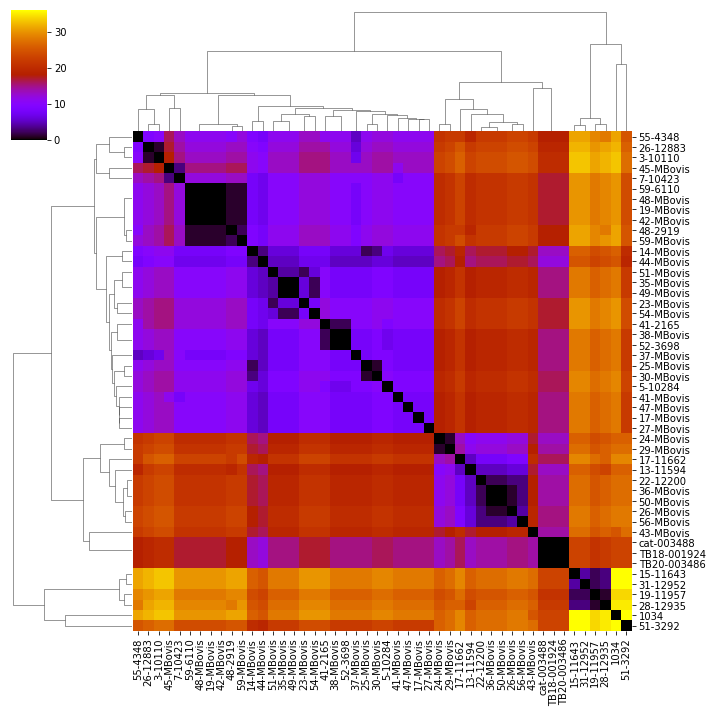

In [210]:
dm = pd.read_csv('/storage/btbgenie/wicklow_results/snpdist.csv',index_col=0)
import seaborn as sns
sns.clustermap(dm, cmap='gnuplot',xticklabels=True,yticklabels=True)

c = dm.loc['cat-003488'].sort_values()[:10]
c
#meta[meta['sample'].isin(c.index)]

In [133]:
csq = app.read_csq_file('/storage/btbgenie/wicklow_results/csq.tsv')
snpmat = app.get_aa_snp_matrix(csq)

In [ ]:
indcsq = app.read_csq_file('/storage/btbgenie/wicklow_results/indels.vcf.gz')

In [313]:
#snps unique to a sample
names = ['cat-003488','TB18-001924','TB20-003486']
#names = ['1034']
reload(tools)
u=tools.get_unique_snps(names, snpmat, False)
u

,,,sample,cat-003488
start,gene,aa,snp_type,
2284754,pks12,3519D>3519E,missense,0


In [ ]:
df=tools.vcf_to_dataframe('/storage/btbgenie/wicklow_results/temp.vcf')
df[df.pos==2284754]

In [ ]:
reload(plotting)
bams={'cat':'wicklow_results/mapped/cat-003488.bam',
      'cat2018':'wicklow_results/mapped/TB18-001924.bam',
      'cat2020':'wicklow_results/mapped/TB20-003486.bam',
      '24':'wicklow_results/mapped/24-MBovis.bam'      
      }
igv = plotting.display_igv(url='http://localhost:8889/files/', ref_fasta='Mbovis_AF212297.fa', 
            gff_file='wicklow_results/Mbovis_AF212297.gb.gff',
            vcf_file='wicklow_results/filtered.vcf.gz', bams=bams)
display(igv)

In [9]:
from igv_jupyterlab import IGV

url = 'http://localhost:8889/files/'

track_list = [{"name": "Mbovis",
                "url": url+"wicklow_results/Mbovis_AF212297.gb.gff",
                "format": "gff",
                "type": "annotation",
                "height":120,
                "indexed": False }              
             ]

colors=['orange','green','lightblue','gray']
i=0
for b in bams:
    d = {"name": b,
        "url":url+bams[b],
        "type": "alignment",
         "displayMode":"SQUISHED",
         "height":110,
         "removable":True,
         "color":colors[i],
        "indexed": True }
    track_list.append(d)
    i+=1

v = IGV.create_track(
    name="VCF",
    url=url+"wicklow_results/filtered.vcf.gz",
    #format="vcf",
    type="variant",
    indexed=True
)
track_list.append(v)

genome = IGV.create_genome(
    name="Mbovis",   
    fasta_url=url+'Mbovis_AF212297.fa',
    index_url=url+'Mbovis_AF212297.fa.fai',
    tracks=track_list
)

igv = IGV(genome=genome)
igv.locus="LT708304.1:2283938-2285249" 
display(igv)


IGV(id='igv_4468286', initialConfig={'id': 'igv_4468286', 'locus': '', 'reference': {'name': 'Mbovis', 'fastaU…

## RD analysis

In [ ]:
from snipgenie import rdiff
reload(rdiff)
rdiff.create_rd_index()
df = W.fastq_table
res = rdiff.find_regions(df,'/storage/btbgenie/wicklow_rd',threads=12)

In [ ]:
X = rdiff.get_matrix(res, cutoff=0.15)
X['ident'] = X.apply(rdiff.apply_rules,1)
plotting.heatmap(X.set_index('ident',append=True), cmap='cubehelix',h=8)
#plt.savefig('rd_wicklow.png')

In [ ]:
samples=pd.read_csv('/storage/btbgenie/wicklow_results/samples.csv')

In [ ]:
reload(rdiff)
names = ['1034', '13-11594', '14-MBovis', '15-11643',
 '17-11662', 'TB18-001924', 'TB20-003486', 'cat-003488']
sub = samples#[samples['sample'].isin(names)]
x = rdiff.get_deletions(sub, app.mbovis_genome, app.mbovis_gb, #mask_file=app.mbovis_mask,
                              label='sample', n_cores=12)
#x.to_csv('wicklow_deletion_regions.csv',index=False)

In [291]:
reload(rdiff)
x = pd.read_csv('wicklow_deletion_regions.csv')
regions = rdiff.filter_regions(x, app.mbovis_mask)

1579
251


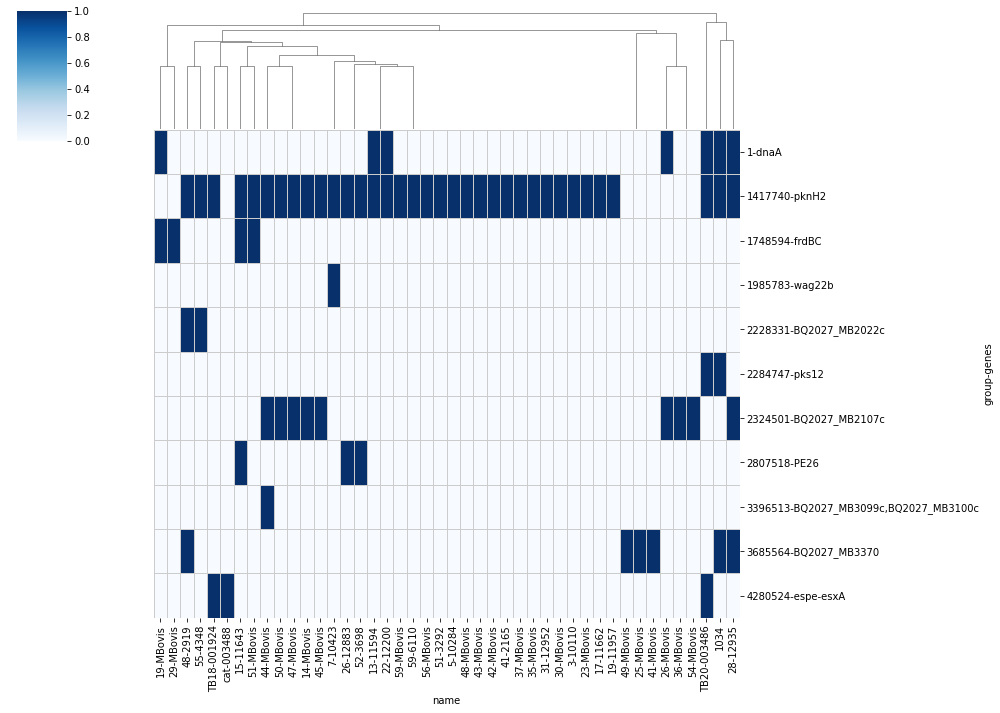

In [330]:
regions
res=regions[regions.length>2]
X=pd.pivot_table(res,index=['group','genes'],columns='name',values='length').fillna(0)
X=X.clip(0,1)
#X=X[X.sum(1)>2]
X
sns.clustermap(X,cmap='Blues',row_cluster=False,yticklabels=True,lw=1,linecolor='.8',figsize=(14,10))

In [ ]:
s=2684020;e=s+10
s=1985783;e=s+20
rdiff.show_coverage(samples,'LT708304.1',s,e,app.mbovis_genome,app.mbovis_gb, minq=0,
                      labelcol='sample',margin=100)